In [2]:
import sys
import SimpleITK as sitk
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline 

import numpy as np
from numpy import array, zeros_like
from scipy.ndimage import zoom

import os
import fnmatch
import shutil
from ipywidgets import interact, fixed
import pandas as pd
from pathlib import Path

from skimage import data
from skimage import color
from skimage import img_as_float
from skimage import exposure
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.transform import rotate

from scipy.ndimage import rotate as rotate_nd

from PIL import Image

import cv2

#parallel computing packages
from numba import jit
import psutil
from multiprocess import Pool



#function for showing volume images
def myshow(image_arr,slice_n):
    plt.imshow(image_arr[slice_n,:,:],cmap='gray')
    plt.show()

In [3]:
df=pd.read_pickle('/mnt/e/Image Processing/Brats Project/resized_pickle.pkl')

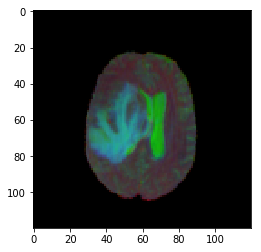

In [53]:
myshow(df.loc[20, 'pseudo'],80)

In [60]:
vol = df.loc[0, 'pseudo']

In [229]:
#function that rotates volume for certain degree

def rotate_array(volume, degree, size=(130, 120, 120, 3)):
    image=np.empty(size)
    
    for i,y in enumerate(volume):
        
        rot=rotate(y, degree)
        image[i]=rot
    return image


def go_and_rotate(data, degree, col=['pseudo', 'seg']):
    
    new_data=pd.DataFrame(index=range(0, 285), columns=col)
    
    
    print('{} start rotating!'.format(col[0]))
    
    
    
    #rotating images
    for index, volume in enumerate(data.loc[:, col[0]]):
        
        new_data.at[index, col[0]]=rotate_array(volume, degree)#putting new array to corresponding place in new dataframe
        print('{} in {} ROTATED! by {}'.format(index, col[0], degree))
    
    
    
    #rotating labels
    for index, volume in enumerate(data.loc[:, col[1]]):
        
        new_data.at[index, col[1]] = rotate_array(volume, degree, size=(130, 120, 120))#putting new array to corresponding place in new dataframe
        print('{} in {} ROTATED! by {}'.format(index, col[1], degree))
        
    return new_data




        

In [ ]:
rot_10 = go_and_rotate(df, 10)
rot_min10 = go_and_rotate(df, -10)

rot_15 = go_and_rotate(df, 15)
rot_min15 = go_and_rotate(df, -15)

rot_20 = go_and_rotate(df, 20)
rot_min20 = go_and_rotate(df, -20)

rot_45=go_and_rotate(df, 45)
rot_min45=go_and_rotate(df, -45)

rot_90=go_and_rotate(df, 90)
rot_mi90=go_and_rotate(df, -90)

rot_180=go_and_rotate(df, 180)

rot_195=go_and_rotate(df, 195)
rot_min195=go_and_rotate(df, -195)

In [213]:
seg_vol=df.seg[0]

In [225]:
rot_seg=rotate_array(seg_vol, 180, size=(130, 120, 120))

In [252]:
rot_90 = rotate_array(vol , 195)

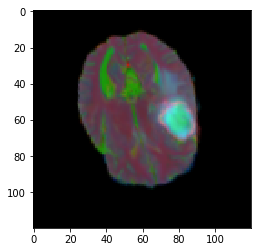

In [253]:
myshow(rot_90, 60)

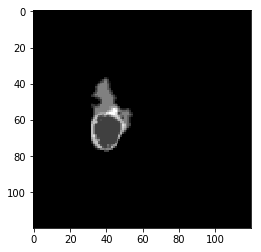

In [228]:
myshow(seg_flip, 60)